In [4]:
#Mengimpor Library yang Diperlukan

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

**Membaca Dataset - menggunakan pandas**

In [8]:
# Membaca dataset
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')

# Melihat beberapa baris pertama dataset
print(df.head())


   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

**Eksplorasi dan Pembersihan Data**

In [9]:
# Mengecek data hilang
print(df.isnull().sum())

# Menghapus data hilang jika ada
df = df.dropna()

# Menampilkan informasi dataset
print(df.info())

# Mengubah kolom 'satisfaction' ke bentuk numerik (1: Puas, 0: Tidak Puas)
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# Menghapus kolom yang tidak relevan seperti 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0', 'id'])  # Contoh kolom yang mungkin tidak relevan


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

**Mengisi variabel yang kosong**

In [30]:
# Cek jumlah nilai kosong pada kolom 'Arrival Delay in Minutes'
df['Arrival Delay in Minutes'].isnull().sum()

# Mengganti nilai kosong dengan rata-rata kolom 'Arrival Delay in Minutes'
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

# Cek ulang apakah ada nilai kosong yang tersisa
df['Arrival Delay in Minutes'].isnull().sum()


/tmp/ipykernel_30/2959446126.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)


0

**Mengecek kembali variable yang hilang**

In [31]:
# Mengecek data hilang
print(df.isnull().sum())

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


 **Pra-pemrosesan Data - Mengonversi variabel kategorikal menjadi variabel numerik (dummy variables)**

In [36]:
# Mengonversi variabel kategorikal menjadi dummy variables
df = pd.get_dummies(df, drop_first=True)

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# Membagi dataset menjadi training dan testing set (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menstandarkan fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Membangun Model Logistic Regression : memprediksi kategori kepuasan penumpang.**

In [39]:
# Membuat dan melatih model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada test set
y_pred = model.predict(X_test_scaled)

**Menghitung akurasi, confusion matrix, dan classification report.**

Accuracy: 0.8729


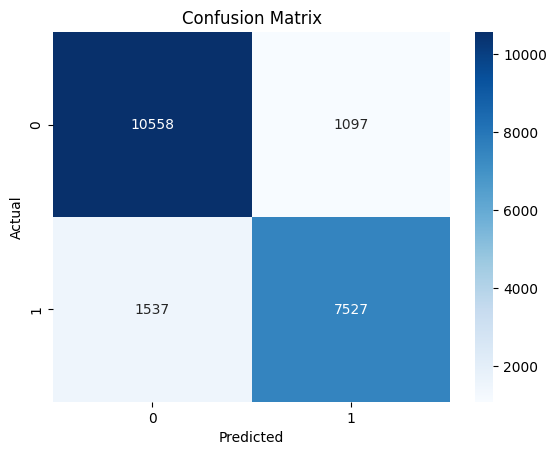

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11655
           1       0.87      0.83      0.85      9064

    accuracy                           0.87     20719
   macro avg       0.87      0.87      0.87     20719
weighted avg       0.87      0.87      0.87     20719



In [40]:
# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


**Menganalisis Faktor-Faktor yang Mempengaruhi Ketidakpuasan Penumpang**

In [41]:
# Melihat koefisien dari model
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients.head(10))  # Menampilkan 10 fitur teratas


                            Coefficient
Online boarding                0.815102
Inflight wifi service          0.527537
Checkin service                0.412530
On-board service               0.387194
Leg room service               0.336125
Cleanliness                    0.285607
Departure Delay in Minutes     0.177470
Baggage handling               0.159044
Inflight service               0.137774
Seat comfort                   0.093111
